# Lab 1: Introduction to Deep Learning
To begin, we need to find some balance between treating neural networks like a total black box, and understanding every single detail with them.

## Typical Model

Let's show a typical model:

![Alt text](https://vitalflux.com/wp-content/uploads/2020/09/Screenshot-2020-09-17-at-11.12.54-AM-1024x586.png "a title")

## Hidden Layers

A basic neural network consists of an input layer, which is just your data, in numerical form. After your input layer, you will have some number of what are called "hidden" layers. A hidden layer is just in between your input and output layers. One hidden layer means you just have a neural network. Two or more hidden layers? Boom, you've got a deep neural network!

Why is this? Well, if you just have a single hidden layer, the model is going to only learn linear relationships.

If you have many hidden layers, you can begin to learn non-linear relationships between your input and output layers.

A single neuron might look as follows:

![Alt text](https://www.researchgate.net/publication/340603309/figure/download/fig2/AS:879847974899717@1586783512929/Diagram-of-the-artificial-neuron-deep-learning-Source-created-by-Chrislb-CC-BY-SA.png "a title")

So this is really where the magic happens. The idea is a single neuron is just sum of all of the inputs x weights, fed through some sort of activation function. The activation function is meant to simulate a neuron firing or not. A simple example would be a stepper function, where, at some point, the threshold is crossed, and the neuron fires a 1, else a 0. Let's say that neuron is in the first hidden layer, and it's going to communicate with the next hidden layer. So it's going to send it's 0 or a 1 signal, multiplied by the weights, to the next neuron, and this is the process for all neurons and all layers.

The mathematical challenge for the artificial neural network is to best optimize thousands or millions or whatever number of weights you have, so that your output layer results in what you were hoping for. Solving for this problem, and building out the layers of our neural network model is exactly what TensorFlow is for. TensorFlow is used for all things "operations on tensors." A tensor in this case is nothing fancy. It's a multi-dimensional array.

## Step 1: Installing Dependency
To install TensorFlow, simply do a:

In [1]:
# code here
# !pip install tensorflow matplotlib

## Step 2: Importing Library
Following the release of deep learning libraries, higher-level API-like libraries came out, which sit on top of the deep learning libraries, like TensorFlow, which make building, testing, and tweaking models even more simple. One such library that has easily become the most popular is Keras.

Keras has become so popular, that it is now a superset, included with TensorFlow releases now! If you're familiar with Keras previously, you can still use it, but now you can use tensorflow.keras to call it. By that same token, if you find example code that uses Keras, you can use with the TensorFlow version of Keras too. In fact, you can just do something like:

In [2]:
# code here
import tensorflow as tf
import os 
os.environ['TF_FPP_MIN_LOG_LEVEL'] = '2' 
print(tf.__version__)

2.13.0


## Step 3: Preparing Data
Once we've got tensorflow imported, we can then begin to prepare our data, model it, and then train it. For the sake of simplicity, we'll be using the most common "hello world" example for deep learning, which is the mnist dataset. It's a dataset of hand-written digits, 0 through 9. It's 28x28 images of these hand-written digits. We will show an example of using outside data as well, but, for now, let's load in this data:

In [3]:
# code here
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

When you're working with your own collected data, chances are, it wont be packaged up so nicely, and you'll spend a bit more time and effort on this step. But, for now, woo!

What exactly do we have here? Let's take a quick peak.

So the x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9. The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)

The testing variants of these variables is the "out of sample" examples that we will use. These are examples from our data that we're going to set aside, reserving them for testing the model.

Neural networks are exceptionally good at fitting to data, so much so that they will commonly over-fit the data. Our real hope is that the neural network doesn't just memorize our data and that it instead "generalizes" and learns the actual problem and patterns associated with it.

Let's look at this actual data:

In [4]:
# code here
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Step 4: Visualising Data
Alright, could we visualize this?

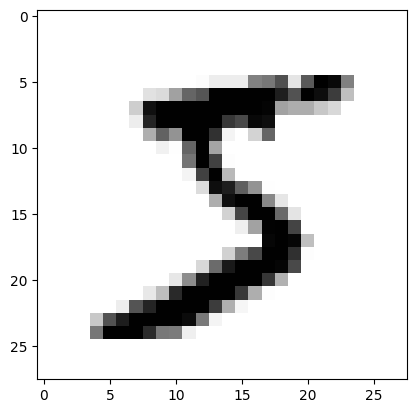

In [5]:
# code here
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary) 
plt.show()

Okay, that makes sense. How about the value for y_train with the same index?

In [6]:
# code here
print(y_train[0])

5


## Step 5: Normalising Data
It's generally a good idea to "normalize" your data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. Let's change that with a handy utility function:

In [7]:
# code here
x_train = tf.keras.utils.normalize(x_train, axis=1) 
x_test = tf.keras.utils.normalize(x_test, axis=1)

Let's peak one more time:

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

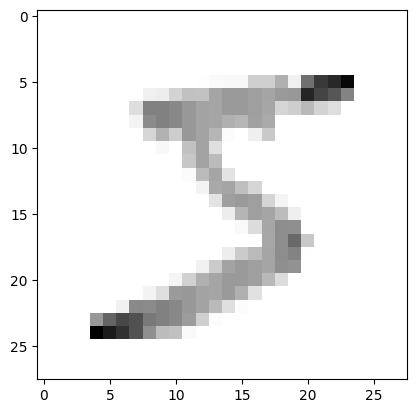

In [8]:
# code here
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary) 
plt.show()

Alright, still a 5. Now let's build our model!

In [9]:
# code here
model = tf.keras.models.Sequential()

A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards...for now.

## Step 6: Flatting Data

Now, we'll pop in layers. Recall our neural network image? Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [10]:
# code here
model.add(tf.keras.layers.Flatten())

## Step 7: Creating Hidden Layers
This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us. Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.

In [11]:
# code here
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. There are many more to test for sure, but, if you don't know what to use, use relu to start.

## Step 8: Adding Rectified Lineer (RELU)

Let's add another identical layer for good measure.

In [12]:
# code here
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Now, we're ready for an output layer:

In [13]:
# code here
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

## Step 9: Compiling Model

Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [14]:
# code here
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Remember why we picked relu as an activation function? Same thing is true for the Adam optimizer. It's just a great default to start with.

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

## Step 10: Training Model

Now, we fit!

In [15]:
# code here
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 954us/step - loss: 0.2614 - accuracy: 0.9239
Epoch 2/3
1875/1875 [==============================] - 2s 926us/step - loss: 0.1062 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 2s 944us/step - loss: 0.0715 - accuracy: 0.9772


As we train, we can see loss goes down (yay), and accuracy improves quite quickly to 98-99% (double yay!)

## Step 11: Evaluating Model

Now that's loss and accuracy for in-sample data. Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).

In [16]:
# code here
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 382us/step - loss: 0.1025 - accuracy: 0.9677
0.10247763991355896
0.9677000045776367


It's going to be very likely your accuracy out of sample is a bit worse, same with loss. In fact, it should be a red flag if it's identical, or better.

## Step 12: Save and Load Model

Finally, with your model, you can save it super easily:

In [17]:
# code here
model.save('ec_num_reader.model')

INFO:tensorflow:Assets written to: ec_num_reader.model/assets


INFO:tensorflow:Assets written to: ec_num_reader.model/assets


Load it back:

In [18]:
# code here
new_model = tf.keras.models.load_model('ec_num_reader.model')

## Step 13: Predictions

Finally, make predictions!

In [19]:
# code here
predictions = new_model.predict(x_test)
print(predictions)

313/313 [==============================] - 0s 352us/step
[[1.46521031e-10 1.24447945e-08 7.08223411e-07 ... 9.99958038e-01
  7.98515742e-09 2.23903385e-06]
 [1.03103859e-09 1.25726787e-04 9.99866724e-01 ... 3.80286913e-09
  5.35980689e-07 1.44838542e-11]
 [6.81209400e-08 9.99805987e-01 1.70687872e-06 ... 1.30603745e-04
  1.70003204e-05 6.14850615e-06]
 ...
 [3.81701923e-08 9.87228645e-07 1.34847909e-07 ... 6.13753127e-06
  6.12819667e-06 5.80339087e-03]
 [9.33989122e-06 4.48256833e-06 4.01688169e-07 ... 6.91539390e-06
  3.51161859e-03 4.09207018e-07]
 [5.23007202e-07 1.18930519e-08 3.16097264e-08 ... 3.21760570e-11
  1.98870521e-06 1.27035307e-08]]


## Step 14: Evaluating Predictions

That sure doesn't start off as helpful, but recall these are probability distributions. We can get the actual number pretty simply:

In [20]:
# code here
import numpy as np

print(np.argmax(predictions[0]))

7


There's your prediction, let's look at the input:

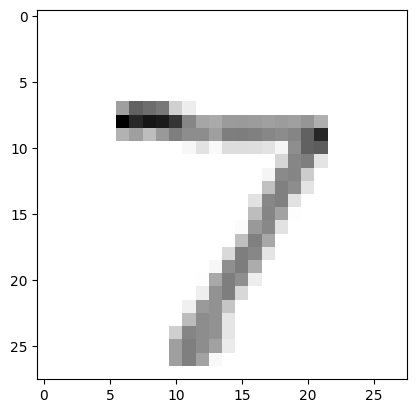

In [21]:
# code here
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

# Conclusion
This is just barely scratching the surface of what's available to you, so start poking around [Tensorflow](https://www.tensorflow.org/api_docs/python/) and [Keras](https://keras.io/layers/about-keras-layers/) documentation.

End of Lab.
